# Rankine Cycle Analysis: the  Ideal Rankine Cycle 

* 1 expression only

* 2 the basic abstraction :List dict,function

* 3 [Object-oriented programming](./Unit4-1-PyThermo-IdealRankineCycle-OOP.ipynb)


##  1. The Ideal Rankine Cycle 

Chapter 8 : Vapor Power Systems:

    Example 8.1:Analyzing an Ideal Rankine Cycle Page 438

Steam is the working fluid in an ideal Rankine cycle. 

Saturated vapor enters the turbine at 8.0 MPa and saturated liquid exits the condenser at a pressure of 0.008 MPa. 

The net power output of the cycle is 100 MW.

![rankine81](./img/rankine81.jpg)

* **Process 1–2:** **Isentropic expansion** of the working fluid through the turbine from saturated vapor at state 1 to the condenser pressure.
* **Process 2–3:** Heat transfer from the working fluid as it flows at **constant pressure**
through the condenser with saturated liquid at state 3.
* **Process 3–4:** **Isentropic compression** in the pump to state 4 in the compressed liquid region.
* **Process 4–1:** Heat transfer to the working fluid as it flows at **constant pressure** through the boiler to complete the cycle.

Determine for the cycle

(a) the thermal efficiency,

(b) the back work ratio, 

(c) the mass flow rate of the steam,in kg/h,

(d) the rate of heat transfer, Qin, into the working fluid as it passes through the boiler, in MW,

(e) the rate of heat transfer, Qout, from the condensing steam as it passes through the condenser, in MW,

(f) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15C and exits at 35C.

### Engineering Model:

* 1 Each **component** of the cycle is analyzed as a **control volume** at steady state. The control volumes are shown on the accompanying sketch by **dashed** lines.


* 2 All processes of the working fluid are internally reversible.


* 3 The turbine and pump operate adiabatically.


* 4 Kinetic and potential energy effects are negligible.


* 5 Saturated vapor enters the turbine. Condensate exits the condenser as saturated liquid.

## 2 Analysis with expression directly- Zero Abstraction

To begin the analysis, we fix each of **the principal states（1，2，3，4)** located on the accompanying schematic and **T–s** diagrams.

In [ ]:
from seuif97 import *

# State  1
p1 = 8.0               #  in MPa
t1 =px2t(p1,1) 
h1=px2h(p1,1)          # h1 = 2758.0    From table A-3  kj/kg
s1=px2s(p1,1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2 ,p2=0.008
p2=0.008
s2 = s1
t2 =ps2t(p2,s2)     
h2 =ps2h(p2,s2)     

# State 3 is saturated liquid at 0.008 MPa
p3 = 0.008            
t3=px2t(p3,0) 
h3 =px2h(p3,0)                                     #  kj/kg
s3 =px2s(p3,0)     

#State 4 
p4 = p1
s4=s3
h4 =ps2h(p4,s4)     
t4 =ps2h(p4,s4)  

### (a) The thermal efficiency

The net power developed by the cycle is

$\dot{W}_{cycle}=\dot{W}_t-\dot{W}_p$

Mass and energy rate balances for control volumes around the turbine and pump give,respectively

$\frac{\dot{W}_t}{\dot{m}}=h_1-h_2$  
$\frac{\dot{W}_p}{\dot{m}}=h_4-h_3$

where $\dot{m}$ is the mass flow rate of the steam. The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as

$\frac{\dot{Q}_{in}}{\dot{m}}=h_1-h_4$

The thermal efficiency is then


$\eta=\frac{\dot{W}_t-\dot{W}_p}{\dot{Q}_{in}}=\frac{(h_1-h_2)-(h_4-h_3)}{h_1-h_4}$


In [ ]:
# Part(a)
# Mass and energy rate balances for control volumes 
# around the turbine and pump give, respectively

# turbine
wtdot = h1 - h2
# pump
wpdot = h4-h3

# The rate of heat transfer to the working fluid as it passes 
# through the boiler is determined using mass and energy rate balances as
qindot = h1-h4

# thermal efficiency
eta = (wtdot-wpdot)/qindot   

# Result for part a
print('(a) The thermal efficiency for the cycle is %.2f' %(eta*100),'%')

**(b)** The back work ratio is

$bwr=\frac{\dot{W}_p}{\dot{W}_t}=\frac{h_4-h_3}{h_1-h_2}$

**(c)** The mass flow rate of the steam can be obtained from the expression for the net power given in part (a). Thus

$\dot{m}=\frac{\dot{W}_{cycle}}{(h_1-h_2)-(h_4-h_3)}$

**(d)** With the expression for $\dot{Q}_{in}$ in from part (a) and previously determined specific enthalpy values

$\dot{Q}_{in}=\dot{m}(h_1-h_4)$

**(e)** Mass and energy rate balances applied to a control volume enclosing the steam side of the condenser give

$\dot{Q}_{out}=\dot{m}(h_2-h_3)$

**(f)** Taking a control volume around the condenser, the mass and energy rate balances give at steady state


$\require{cancel} 0=\dot{\cancel{Q}}^{0}_{cv}-\dot{\cancel{w}}^{0}_{cv}+\dot{m}_{cw}(h_{cw,in}-h_{cw,out})+\dot{m}(h_2-h_3)$

where $\dot{m}_{cw}$ is the mass flow rate of the cooling water. Solving for $\dot{m}_{cw}$

 $\dot{m}_{cw}=\frac{\dot{m}(h_2-h_3)}{h_{cw,in}-h_{cw,out}}$

In [ ]:
# Part(b)
# back work ratio：bwr, defined as the ratio of the pump work input to the work 
# developed by the turbine.
bwr = wpdot/wtdot                                    # 

# Result
print('(b) The back work ratio is %.3f'%(bwr*100),'%')

# Part(c)
Wcycledot = 100.00     # the net power output of the cycle in MW
mdot = (Wcycledot*10**3*3600)/((h1-h2)-(h4-h3))       # mass flow rate in kg/h

# Result 
print('(c) The mass flow rate of the steam is %.2f' %mdot,'kg/h.')
 
# Part(d)
Qindot = mdot*qindot/(3600*10**3)                     # in MW

# Results
print('(d) The rate of heat transfer Qindot into the working fluid as'+
      ' it passes through the boiler is %.2f' %Qindot,'MW.')

# Part(e)
Qoutdot = mdot*(h2-h3)/(3600*10**3)                   # in MW

# Results
print('(e) The rate of heat transfer Qoutdot from the condensing steam '+
      'as it passes through the condenser is {:.2f} MW.'.format(Qoutdot))

# Part(f)
# Given: 
tcwin=15
tcwout=35

hcwout=tx2h(tcwout,0)   # From table A-2,hcwout= 146.68  kj/kg  

hcwin= tx2h(tcwin,0)    # hcwin 62.99  
mcwdot= (Qoutdot*10**3*3600)/(hcwout-hcwin)          # in kg/h

# Results
print('(f) The mass flow rate of the condenser cooling water is %.2f kg/h.'%mcwdot )

## 3 Analyzing an Ideal Rankine Cycle with the basic abstraction 

* **List,Dict,Function**


### 3.1 The simple  basic abstraction 

To begin the analysis, we fix each of **the principal states（1，2，3，4)** located on the accompanying schematic and **T–s** diagrams.

The ideal rankine cycle:
```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```


In [3]:
from seuif97 import *

# Analysis: fix each of 
#     the principal states   （1,2,3,4) 
#               ->   Nodes    (0,1,2,3)

def fixeachoftheprincipalstates():
    numNodes=4
   
    p=[None  for node in range(numNodes)]
    t=[None  for node in range(numNodes)]
    h=[None  for node in range(numNodes)]
    s=[None  for node in range(numNodes)]

    # State  1, Node 0
    p[0] = 8.0               #  in MPa
    t[0]=px2t(p[0],1)
    h[0]=px2h(p[0],1)        
    s[0]=px2s(p[0],1)         

    # State  2, Node 1
    p[1]=0.008
    s[1] = s[0]
    t[1] =ps2t(p[1],s[1])     
    h[1] =ps2h(p[1],s[1])  

    # State 3 , Node 2 saturated liquid at 0.008 MPa
    p[2] = 0.008            
    t[2] =px2t(p[2],0) 
    h[2] =px2h(p[2],0)                                     #  kj/kg
    s[2] =px2s(p[2],0)   

    #State 4 , Node 3
    p[3] = p[0]
    s[3]=s[2]
    h[3] =ps2h(p[3],s[3])     
    t[3] =ps2t(p[3],s[3])  
    
    return (p,t,h,s)

#### T-S

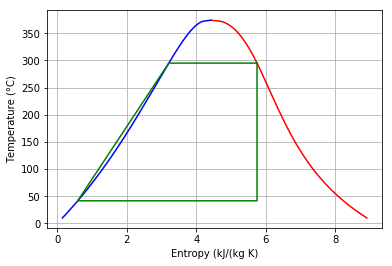

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

p,t,h,s=fixeachoftheprincipalstates()

# point 5
t.append(px2t(p[0],0))
s.append(px2s(p[0],0))

tt=t[:]
ss=s[:]
tt.append(t[0])
ss.append(s[0])
#tt=[t[0],t[1],t[2],t[3],t[4],t[0]] 
#ss=[s[0],s[1],s[2],s[3],s[4],s[0]]

plt.plot(ss, tt, 'g-')

plt.xlabel('Entropy (kJ/(kg K)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

#### Modified T-s

* set fonts, Windows only

* for Chinese: FangSong or simfang

* annotate


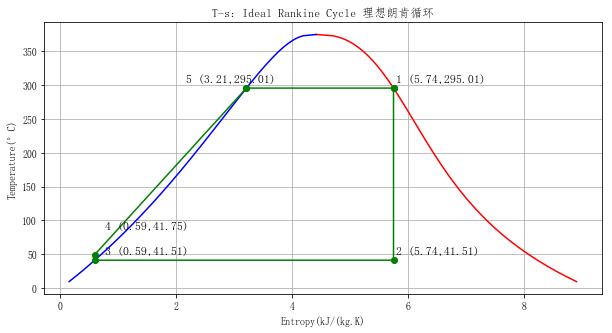

In [5]:
%matplotlib inline

#from matplotlib.font_manager import * 
from matplotlib import rcParams # figure Params

import matplotlib.pyplot as plt
import numpy as np

# set fonts, Windows only
# for Chinese: FangSong or simfang,y
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif']=['FangSong'] # Chinese-FangSong

rcParams['axes.unicode_minus']=False

# optional-chinese
#myfont=FontProperties(fname='C:/Windows/Fonts/simfang.ttf') 

#plt.figure()
plt.figure(figsize=(10.0,5.0)) # figsize :set figure size

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]] # saturated vapor tx2s(t, 1),x=1
sliq = [s for s in [tx2s(t, 0) for t in npt]] # saturated liquid tx2s(t, 0),x=0
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

# t4稍高于t3，直接绘图3，4点几乎重叠,
# 调整t4为显示虚拟值，消除重叠，定性反映热力过程
t[3]=t[3]+8

# point 5
t.append(px2t(p[0],0))
s.append(px2s(p[0],0))

tt=t[:]
ss=s[:]
tt.append(t[0])
ss.append(s[0])

plt.plot(ss, tt, 'go-')

plt.annotate('1 ({:.2f},{:.2f})'.format(s[0],t[0]),
             xy=(s[0],t[0]), xycoords='data',
             xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('2 ({:.2f},{:.2f})'.format(s[1],t[1]),
             xy=(s[1], t[1]), xycoords='data',
             xytext=(+2, +5), textcoords='offset points', fontsize=12)

plt.annotate('3 ({:.2f},{:.2f})'.format(s[2],t[2]),
             xy=(s[2], t[2]), xycoords='data',
             xytext=(+10, +5), textcoords='offset points', fontsize=12)

plt.annotate('4 ({:.2f},{:.2f})'.format(s[3],t[3]-8),
             xy=(s[3], t[3]), xycoords='data',
             xytext=(+10, +25), textcoords='offset points', fontsize=12)


plt.annotate('5 ({:.2f},{:.2f})'.format(s[4],t[4]),
             xy=(s[4], t[4]), xycoords='data',
             xytext=(-60, +5), textcoords='offset points', fontsize=12)

#plt.title('T-s: Ideal Rankine Cycle')
plt.title('T-s: Ideal Rankine Cycle 理想朗肯循环')

# optional-chinese
#plt.title('T-s: Ideal Rankine Cycle 理想朗肯循环',fontproperties=myfont) 

plt.xlabel('Entropy(kJ/(kg.K)')
plt.ylabel('Temperature(°C)')
plt.grid()
plt.show()

#### 获取matplotlibrc文件

In [ ]:
import matplotlib
matplotlib.matplotlib_fname() #获取matplotlibrc文件

In [ ]:
# %load c:\\python37\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc

#### matplotlib rcParams

a `matplotlibrc` file: same parameters are read at startup to configure matplotlib 

Dynamic rc settings

You can also dynamically change the default `rc` settings in a python script or interactively from the python shell. All of the `rc` settings are stored in a dictionary-like variable called `matplotlib.rcParams`, which is global to the matplotlib package. rcParams can be modified directly

#### Annotation

https://matplotlib.org/users/annotations.html
    
The uses of the basic `text()` will place text at an arbitrary position on the Axes. A common use case of text is to annotate some feature of the plot, and the `annotate()` method provides helper functionality to make annotations easy. 

In an annotation, there are two points to consider: the `location` being annotated represented by the argument `xy` and the `location` of the text `xytext`. Both of these arguments are `(x,y)` tuples.   

### (a) The thermal efficiency

The net power developed by the cycle is

$\dot{W}_{cycle}=\dot{W}_t-\dot{W}_p$

Mass and energy rate balances for control volumes around the turbine and pump give,respectively

$\frac{\dot{W}_t}{\dot{m}}=h_1-h_2$  
$\frac{\dot{W}_p}{\dot{m}}=h_4-h_3$

where $\dot{m}$ is the mass flow rate of the steam. The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as

$\frac{\dot{Q}_{in}}{\dot{m}}=h_1-h_4$

The thermal efficiency is then


$\eta=\frac{\dot{W}_t-\dot{W}_p}{\dot{Q}_{in}}=\frac{(h_1-h_2)-(h_4-h_3)}{h_1-h_4}$


In [ ]:
from seuif97 import *

def Determineforthecycle(h,Wcycledot):
    
    results={}
    
    # Part(a)
    # Mass and energy rate balances for control volumes 
    # around the turbine and pump give, respectively

    # turbine
    results['wtdot'] = h[0] - h[1]
    # pump
    results['wpdot'] = h[3]-h[2]

    # The rate of heat transfer to the working fluid as it passes 
    # through the boiler is determined using mass and energy rate balances as
    results['qindot'] = h[0]-h[3]

    # thermal efficiency
    results['eta'] = ( results['wtdot'] -results['wpdot'])/ results['qindot']    

    # Part(b)
    # back work ratio：bwr, defined as the ratio of the pump work input to the work 
    # developed by the turbine.
    results['bwr'] =results['wpdot']/results['wtdot']                                   # 

    # Part(c)
    results['mdot'] = (Wcycledot*10**3*3600)/((h[0]-h[1])-(h[3]-h[2]))       # mass flow rate in kg/h
 
    # Part(d)
    results['Qindot'] = results['mdot']*results['qindot']/(3600*10**3)                     # in MW

    # Part(e)
    results['Qoutdot'] = results['mdot']*(h[1]-h[2])/(3600*10**3)                   # in MW
    return results

def DeterminefortheCondensate(Qoutdot):
    # Part(f)
    # Given: 
    tcwin=15
    tcwout=35

    hcwout=tx2h(tcwout,0)   # From table A-2,hcwout= 146.68  kj/kg  
    hcwin= tx2h(tcwin,0)    # hcwin 62.99  
    mcwdot= (Qoutdot*10**3*3600)/(hcwout-hcwin)              
    return  mcwdot        


In [ ]:
Wcycledot = 100.00     # the net power output of the cycle in MW
p,t,h,s,v,x=fixeachoftheprincipalstates()  
cycleResults=Determineforthecycle(h,Wcycledot)
cycleResults['mcwdot']=DeterminefortheCondensate(cycleResults['Qoutdot'])

# Results
print('(a) The thermal efficiency for the cycle is %.3f '%(cycleResults['eta']*100),'%')
print('(b) The back work ratio is %.3f' %(cycleResults['bwr']*100),'%')
print('(c) The mass flow rate of the steam is %.2f' %cycleResults['mdot'],'kg/h.')
print('(d) The rate of heat transfer,Qindotinto the working fluid as \
      \n\t it passes through the boiler is %.2f' %cycleResults['qindot'],'MW.')
print('(e) The rate of heat transfer,Qoutdot from the condensing steam as \
       \n\t it passes through the condenser, %.2f' %cycleResults['Qoutdot'],'MW.')
print('(f) The mass flow rate of the condenser cooling water is %.2f'%cycleResults['mcwdot'],'kg/h.')

### 3.2 The  in-depth abstraction 

The ideal rankine cycle:
```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```
 States, Devices, Rankine Cycle

#### 1 States

In [ ]:
from seuif97 import *

# Analysis: fix each of 
#     the principal states   （1,2,3,4) 
#               ->   Nodes    (0,1,2,3)

def FixeStates(States):
   
    # State  1, Node 0
    States[0]['p'] = 8.0   
    p=States[0]['p']
    States[0]['t']=px2t(p,1)
    States[0]['h']=px2h(p,1)        
    States[0]['s']=px2s(p,1)         

    # State  2, Node 1
    States[1]['p']=0.008
    States[1]['s'] = States[0]['s']
    p=States[1]['p']
    s= States[1]['s']    
    States[1]['t']=ps2t(p,s)     
    States[1]['h'] =ps2h(p,s)  

    # State 3 , Node 2 saturated liquid at 0.008 MPa
    States[2]['p'] = 0.008  
    p=States[2]['p'] 
    States[2]['t'] =px2t(p,0) 
    States[2]['h'] =px2h(p,0)                                     #  kj/kg
    States[2]['s'] =px2s(p,0)   

    #State 4 , Node 3
    States[3]['p'] = States[0]['p']
    States[3]['s']= States[2]['s']
    p=States[3]['p']
    s=States[3]['s']
    States[3]['h'] =ps2h(p,s)     
    States[3]['t'] =ps2t(p,s)  
    
    return  States

#### 2 Devices


The ideal rankine cycle:
```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```


In [ ]:
def SetDevices(States):
    Boiler={'min':States[3],'mout':States[0],'qindot':None}
    Turbine={'min':States[0],'mout':States[1],'wdot':None}                                 
    Pump={'min':States[2],'mout':States[3],'wdot':None}                                 
    return Boiler,Turbine,Pump      

def CalDevices(Boiler,Turbine,Pump):
    Boiler['qindot']=Boiler['mout']['h']-Boiler['min']['h']
    Turbine['wdot']=  Turbine['min']['h']- Turbine['mout']['h']                                        
    Pump['wdot']=  Pump['mout']['h']- Pump['min']['h'] 

#### 3 Rankine Cycle

In [ ]:
def CalCycle( Boiler,Turbine,Pump,Cycle):
    # thermal efficiency
    Cycle['eta'] = (Turbine['wdot'] -Pump['wdot'])/  Boiler['qindot']    
    # Part(b)
    Cycle['bwr'] =Turbine['wdot']/Pump['wdot']                                   
    # Part(c)
    Cycle['mdot'] = (Cycle['Wdot']*10**3*3600)/(Turbine['wdot']- Pump['wdot'])       # mass flow rate in kg/h
    # Part(d)
    Boiler['Qindot'] = Cycle['mdot']*Boiler['qindot']/(3600*10**3)                     # in MW
    Cycle['Qindot']=Boiler['Qindot']


### Analysis

* pprint — Data pretty printer https://docs.python.org/3/library/pprint.html

In [ ]:
States=[{} for i in range(4)]
States=FixeStates(States)

Boiler,Turbine,Pump=SetDevices(States)
CalDevices(Boiler,Turbine,Pump)

Cycle={'Wdot':100.0}
CalCycle(Boiler,Turbine,Pump,Cycle)

print('(a) The thermal efficiency for the cycle is %.3f '%(Cycle['eta']*100),'%\n')

import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(Cycle)
pp.pprint(Boiler)
pp.pprint(Turbine)
pp.pprint(Pump)

## Reference

* Michael J. Moran, Howard N. Shapiro, Daisie D. Boettner, Margaret B. Bailey. Fundamentals of Engineering Thermodynamics(7th Edition). John Wiley & Sons, Inc. 2011